[Notion](https://www.notion.so/aspirina180mg/Soy-Henry-49afb64d6c0641cc80dbc0378dd2db34?pvs=4)

[Kick-Off](https://drive.google.com/file/d/1l1SM-UAw5Mdkr6lmQ9X5UI4cxU_FRg_D/view)

[Slides](https://docs.google.com/presentation/d/1kRrCZDL-ZgZnm4DQ62Ovelf92uP-s4b7cdtp3gkK_kU/edit#slide=id.g2420ab8e36f_0_208)

[Repositorio](https://github.com/soyHenry/PI_DA/tree/Full_Time)

[R√∫brica](https://docs.google.com/spreadsheets/d/e/2PACX-1vTy9Ome3iLIl40SZ2jciZLiwARr9MVXfo_Mud3vVCin9P4zroAw_oxVQVch6m4TKivmUjFrYJKMJJhS/pubhtml)

# **EDA**

## **Importaci√≥n de librer√≠as**

*   `numpy` para realisar c√°lculos matem√°ticos y estad√≠sticos.
*   `pandas` para realizar an√°lisis de datos.
*   `matplotlib` para realisar gr√°ficos de los datos.
*   `seaborn` para realisar un heatmap.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Carga de datos**

### **Se cargan los datos desde archivos parquet pre-procesados.**

*   homicidios se carga en df_homicidios
*   lesiones se carga en df_lesiones

In [2]:
df_homicidios = pd.read_parquet("Datasets/df_homicidios.parquet")
df_lesiones = pd.read_parquet("Datasets/df_lesiones.parquet")

## **Valores at√≠picos y Outliers**

In [3]:
def identificar_outliers_std(df, columna, umbral=3):
    """
    df: DataFrame
    columna: Nombre de la columna en la que se identificar√°n los outliers
    umbral: desviaci√≥n por encima o debajo de la media para considerar un valor como outlier
    """
    promedio = df[columna].mean()
    std = df[columna].std()
    limite_inferior = promedio - umbral * std
    limite_superior = promedio + umbral * std
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers

outliers_homicidios = identificar_outliers_std(df_homicidios, 'Altura')
print("Outliers en df_homicidios:")
print(outliers_homicidios)

outliers_lesiones = identificar_outliers_std(df_lesiones, 'altura')
print("\nOutliers en df_lesiones:")
print(outliers_lesiones)

Outliers en df_homicidios:
            ID      ACUSADO      FECHA                HORA  COMUNA  \
124  2016-0154         MOTO 2016-11-26 1900-01-01 14:14:00       8   
406  2018-0116       CARGAS 2018-11-01 1900-01-01 10:50:00       8   
442  2019-0008     MULTIPLE 2019-01-30 1900-01-01 22:45:00       8   
671  2021-0052  OBJETO FIJO 2021-06-20 1900-01-01 05:40:00       8   

          LUGAR_DEL_HECHO TIPO_DE_CALLE           Calle   Altura Cruce  \
124     AV GRAL PAZ 15200      GRAL PAZ  PAZ, GRAL. AV.  15200.0  None   
406  Paz, Gral. Av. 14800      GRAL PAZ  PAZ, GRAL. AV.  14800.0  None   
442  PAZ, GRAL. AV. 16080      GRAL PAZ  PAZ, GRAL. AV.  16080.0  None   
671  PAZ, GRAL. AV. 14723      GRAL PAZ  PAZ, GRAL. AV.  14723.0  None   

    Direcci√≥n Normalizada      pos x      pos y  N_VICTIMAS VICTIMA  \
124  PAZ, GRAL. AV. 15200 -58.490078 -34.682510           1    MOTO   
406  PAZ, GRAL. AV. 14800 -58.493713 -34.679813           1  PEATON   
442  PAZ, GRAL. AV. 16080 -58.478024 

Se puede observar que las filas destacadas son las que presentan datos faltantes en la columna "Cruce", por lo que se ignorar√° esta informaci√≥n faltante por no ser un dato primordial,m se tiene otros datos con los que se puede inferir la ubicaci√≥n.

## **An√°lisis Monovariado**

**Se utiliz√≥ el siguiente c√≥digo para hacer un an√°lisis general de las variables e identificar posibles highlights con las que comenzar el an√°lisis m√°s en profundidad, no se ejecutar√° por razones de ahorrar espacio y tiempo de procesamiento en el archivo.**

In [4]:
''' C√≥digo de exploraci√≥n univariada autom√°tica
# Funci√≥n para exploraci√≥n univariada de variables num√©ricas
def exploracion_univariada_numerica(df):
    # Histogramas
    df.select_dtypes(include=['int', 'float']).hist(figsize=(12, 8))
    plt.suptitle('Histogramas de Variables Num√©ricas', fontsize=16)
    plt.show()
    
    # Boxplots
    for column in df.select_dtypes(include=['int', 'float']).columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df[column], orient="h")
        plt.title(f'Boxplot de {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.show()
    
    # Estad√≠sticas descriptivas
    print("Estad√≠sticas descriptivas de variables num√©ricas:")
    print(df.describe())
    print("\n")

# Funci√≥n para exploraci√≥n univariada de variables categ√≥ricas
def exploracion_univariada_categorica(df):
    # Gr√°ficos de barras
    for column in df.select_dtypes(include=['object']).columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=column, palette='Set3')
        plt.title(f'Gr√°fico de Barras de {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.xticks(rotation=45)
        plt.show()
    
    # Conteos
    print("Conteo de valores para variables categ√≥ricas:")
    for column in df.select_dtypes(include=['object']).columns:
        print(df[column].value_counts())
        print("\n")

# Exploraci√≥n univariada de df_homicidios
print("Exploraci√≥n univariada de df_homicidios:")
exploracion_univariada_numerica(df_homicidios)
exploracion_univariada_categorica(df_homicidios)

# Exploraci√≥n univariada de df_lesiones
print("Exploraci√≥n univariada de df_lesiones:")
exploracion_univariada_numerica(df_lesiones)
exploracion_univariada_categorica(df_lesiones)
'''
print("") # necesario para eliminar impresi√≥n de todo el c√≥digo como salida

## **An√°lisis Monovariado df_homicidios**

### Hora de Accidente

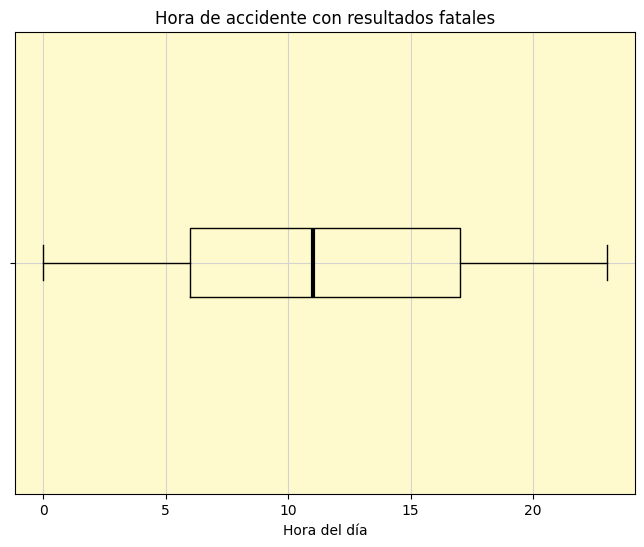

Estad√≠sticas relevantes para df_homicidios.HORA:
Promedio: 11.572237960339944
Mediana: 11.0
Rango Intercuartil: 11.0
M√≠nimo: 0
M√°ximo: 23
Desviaci√≥n Estandar: 6.683399129230539


In [5]:
# Gr√°fico de caja y bigotes
plt.figure(figsize=(8, 6))
plt.boxplot(df_homicidios['HORA'].dt.hour, vert=False, labels=[''], medianprops=dict(color="Black", linewidth=3))
plt.xlabel('Hora del d√≠a')
plt.title('Hora de accidente con resultados fatales')
plt.gca().set_facecolor('lemonchiffon')
plt.grid(True, color="lightgray")
plt.show()

print("Estad√≠sticas relevantes para df_homicidios.HORA:")
print(f"Promedio: {df_homicidios['HORA'].dt.hour.mean()}")
print(f"Mediana: {df_homicidios['HORA'].dt.hour.median()}")
print(f"Rango Intercuartil: {df_homicidios['HORA'].dt.hour.quantile(0.75)-df_homicidios['HORA'].dt.hour.quantile(0.25)}")
print(f"M√≠nimo: {df_homicidios['HORA'].dt.hour.min()}")
print(f"M√°ximo: {df_homicidios['HORA'].dt.hour.max()}")
print(f"Desviaci√≥n Estandar: {df_homicidios['HORA'].dt.hour.std()}")

Se observa que la hora promedio de accidenes fatales ronda las 11:30, la mediana, siendo 11 indica que hay m√°s accidentes durante el medio d√≠a que durante la media noche, el rango intercuartil con un valor de 11 indica que hay una leve concentraci√≥n en los horarios por debajo y por sobre la mediana, es decir, a las 11, finalmente la desviaci√≥n estandar, siendo de un poco m√°s de 6 horas y media, indica una gran dispersi√≥n en los datos, por lo que no hay un rango horario exacto donde hayan m√°s muertes causadas por accidentes vi√°les, sino que se registran accidentes durante todo el d√≠a, pero se observa una leve tendencia a haber m√°s accidentes durante el d√≠a que durante la noche.

**Conclusi√≥n Temporal**

Hay accidentes viales fatales durante todas las horas del d√≠a, hay una leve concentraci√≥n durante las horas entre las 6 am y las 5 pm, con una divisi√≥n de esta misma concentraci√≥n a las 11 am, indicando que la mayor concentraci√≥n de accidentes es durante el tramo entre las 6 am y las 11 am, pero esto es en un grado leve, no algo significativo.

### Edad de v√≠ctima

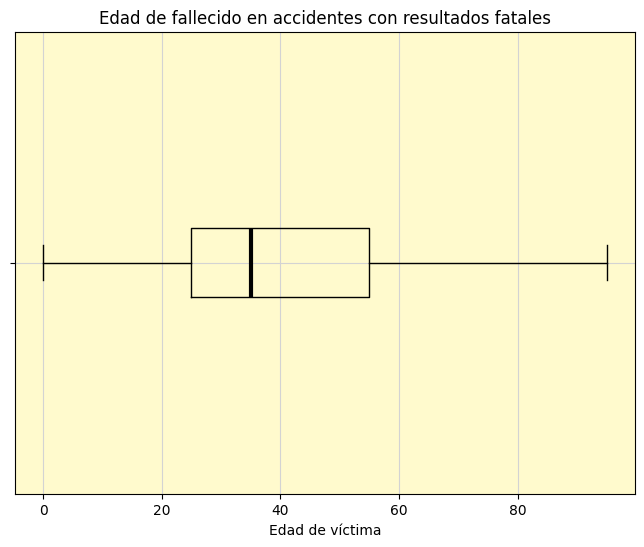

Estad√≠sticas relevantes para df_homicidios.EDAD:
Promedio: 39.240793201133144
Mediana: 35.0
Rango Intercuartil: 30.0
M√≠nimo: 0
M√°ximo: 95
Desviaci√≥n Estandar: 21.816158536063327


In [6]:
# Gr√°fico de caja y bigotes
plt.figure(figsize=(8, 6))
plt.boxplot(df_homicidios['EDAD'], vert=False, labels=[''], medianprops=dict(color="black", linewidth=3))
plt.xlabel('Edad de v√≠ctima')
plt.title('Edad de fallecido en accidentes con resultados fatales')
plt.gca().set_facecolor('lemonchiffon')
plt.grid(True, color="lightgray")
plt.show()

print("Estad√≠sticas relevantes para df_homicidios.EDAD:")
print(f"Promedio: {df_homicidios['EDAD'].mean()}")
print(f"Mediana: {df_homicidios['EDAD'].median()}")
print(f"Rango Intercuartil: {df_homicidios['EDAD'].quantile(0.75)-df_homicidios['EDAD'].quantile(0.25)}")
print(f"M√≠nimo: {df_homicidios['EDAD'].min()}")
print(f"M√°ximo: {df_homicidios['EDAD'].max()}")
print(f"Desviaci√≥n Estandar: {df_homicidios['EDAD'].std()}")

Se observa que la edad promedio de fallecimiento en accidenes fatales ronda los 39 a√±os, la mediana, siendo 35 indica que hay m√°s fallecidos de edades menores, ya que el m√≠nimo es 0 y el m√°ximo son 95, se presenta mayor concentraci√≥n en las edades cercanas a los 30 a√±os, el rango intercuartil con un valor de 30 indica que hay una mayor concentraci√≥n en los rangos entre los 25 y 55 a√±os, finalmente la desviaci√≥n estandar, siendo de un poco menos de 22 a√±os, es menor que la media y el rango intercuartil, por lo que no hay una gran dispersi√≥n en los datos, se observa la tendencia a las victimas fatales de edades en el rango entre 25 y 35 a√±os, lo que puede se√±alar conductores novatos, que est√°n consiguiendo su primer veh√≠culo.

**Conclusi√≥n Temporal**

Dado que se observa que los accidentes fatales tienen una mayor concentraci√≥n en edades relativamente j√≥venes, es de suponer que sus conductores, inexpertos, son m√°s propensos a tener accidentes, y la sobreconfianza puede llevar a un resultado fatal.
Considerando las observaciones anteriores, se puede justificar la concentraci√≥n leve en horarios entre las 6 y 11 am, ya que son horas de transporte a escuelas y trabajos, lo que puede generar, junto con el estr√©s, errores de conducci√≥n que puedan resultar en accidentes fatales.

### Veh√≠culo acusado del accidente

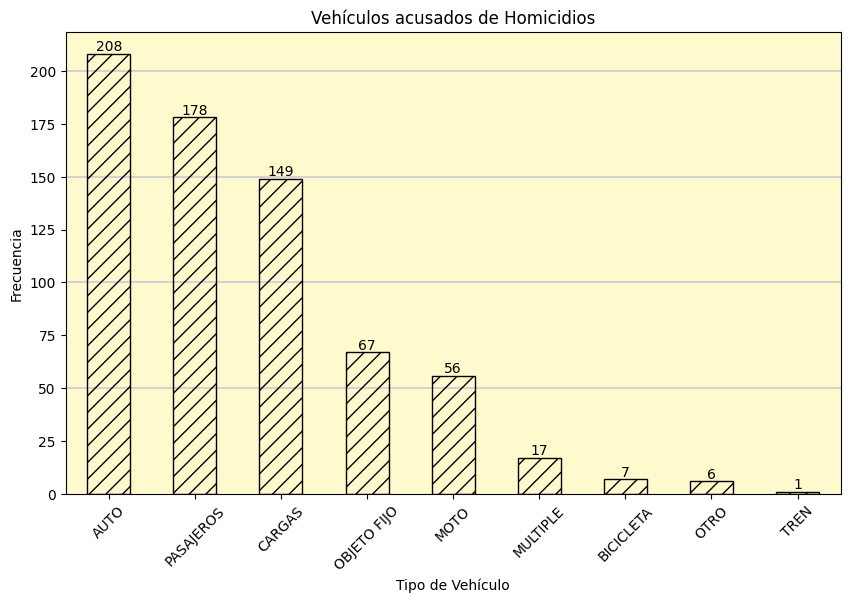

Valores del gr√°fico de ACUSADO
AUTO           208
PASAJEROS      178
CARGAS         149
OBJETO FIJO     67
MOTO            56
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64


In [45]:
frecuencia_acusado = df_homicidios['ACUSADO'].value_counts()
plt.figure(figsize=(10, 6))
frecuencia_acusado.plot(kind='bar', color='none', edgecolor='black', hatch='//')
plt.title('Veh√≠culos acusados de Homicidios')
plt.xlabel('Tipo de Veh√≠culo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.gca().set_facecolor('lemonchiffon')
for i in range(50, max(frecuencia_acusado), 50):
    plt.axhline(y=i, color='lightgray', zorder=0)
for i, valor in enumerate(frecuencia_acusado):
    plt.text(i, valor, str(valor), ha='center', va='bottom')
plt.show()

print("Valores del gr√°fico de", frecuencia_acusado)

se observa que los tipo de acusado m√°s comunes son:
*   Autos, Autom√≥viles de hasta 9 plazas, presumiblemente la mayor√≠a son veh√≠culos particulares, lo que explica que habiendo una mayor cantidad de estos, sea el acusado m√°s com√∫n.
*   Pasajeros, personas que est√°n ascendiendo, dentro, o descendiendo de un transporte p√∫blico, se observar√° el gr√°fico de victimas para complementar esta informaci√≥n.
*   Cargas, veh√≠culos con capacidad de carga, principalmente camiones, considerando la gran cantidad de horas que pasan conduciendo, se explica porqu√© est√°n tan alto en el gr√°fico.

Otra observaci√≥n importante, es que alredeedor del 77% de todos los acusados se catalogan dentro de estas 3 categor√≠as.

**Conclusi√≥n Temporal**

El tipo de acusado m√°s com√∫n se conlleva con lo observado hasta el momento, una persona joven, que est√° conduciendo r√°pido para llegar a su trabajo, luego de dejar a sus hijos en la escuela, e incluso a su pareja, va ahora tarde a su lugar de trabajo, por lo que maneja m√°s r√°pido para poder llegar, y esto puede resultar muy facilmente en un accidente, que lamentablemente puede resultar en resultados fatales, no necesariamente siendo el mismo conductor.

### Transporte que ocupaba la victima del accidente

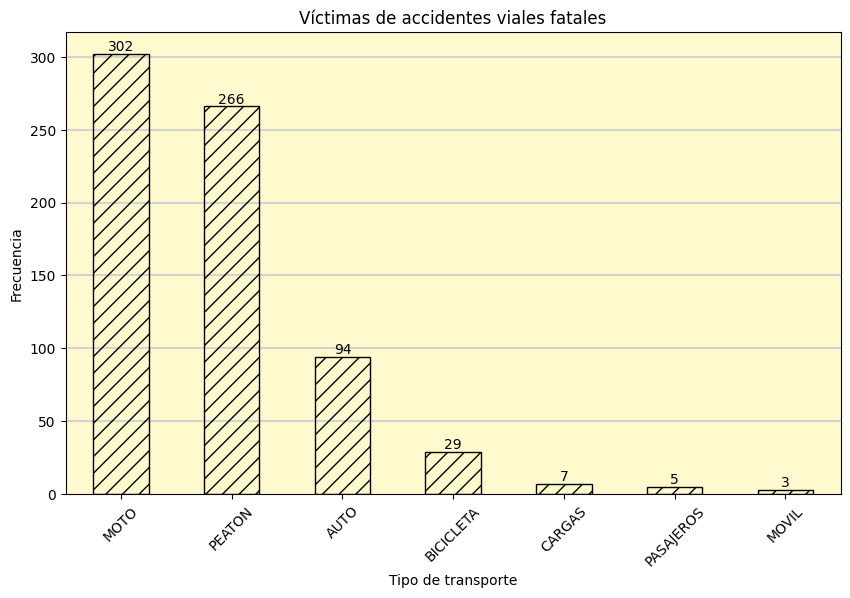

Valores del gr√°fico de VICTIMA
MOTO         302
PEATON       266
AUTO          94
BICICLETA     29
CARGAS         7
PASAJEROS      5
MOVIL          3
Name: count, dtype: int64


In [46]:
frecuencia_acusado = df_homicidios['VICTIMA'].value_counts()
plt.figure(figsize=(10, 6))
frecuencia_acusado.plot(kind='bar', color='none', edgecolor='black', hatch='//')
plt.title('V√≠ctimas de accidentes viales fatales')
plt.xlabel('Tipo de transporte')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.gca().set_facecolor('lemonchiffon')
for i in range(50, max(frecuencia_acusado), 50):
    plt.axhline(y=i, color='lightgray', zorder=0)
for i, valor in enumerate(frecuencia_acusado):
    plt.text(i, valor, str(valor), ha='center', va='bottom')
plt.show()

print("Valores del gr√°fico de", frecuencia_acusado)

se observa que los tipo de transporte m√°s comunes son:
*   Motos, se comprende que el conductor o su pasajero est√°n m√°s expuestos que en otro tipo de veh√≠culo, por lo que un accidente es m√°s propenso a ser fatal.
*   Peatones, similar al punto anterior, est√°n m√°s expuestos que otros veh√≠culos, cabe mencionar que la estad√≠stica tambi√©n es muy similar a la de motos.
*   Autos, Autom√≥viles de hasta 9 plazas, presumiblemente la mayor√≠a son veh√≠culos particulares, lo que explica que habiendo una mayor cantidad de estos, sea una de las v√≠ctimas m√°s comunes.

Otra observaci√≥n importante, es que alredeedor del 80% de las v√≠ctimas son Motos o Peatones, y si agregamos los Autos alcanzamos un 94%.

**Conclusi√≥n Temporal**

Siguiendo con el ejemplo anterior, este joven, que est√° conduciendo para llegar r√°pido a su trabajo, podr√≠a tomar la decisi√≥n errada de no respetar un pare, o un sem√°foro en rojo, y dado que no es el √∫nico que va atrasado durante estas horas, otros conductores o peatones podr√≠an tambi√©n ir apurados y no fijandose en su entorno, podr√≠a ser el caso de un motociclista que pasa en un cruce, sabiendo que tiene preferencia, pero el antes mencionado conductor que no respet√≥ las normas de tr√°nsito, pas√≥ erradamente y colision√≥ con el motociclista, causando un accidente.

### Relaci√≥n de la v√≠ctima al acusado

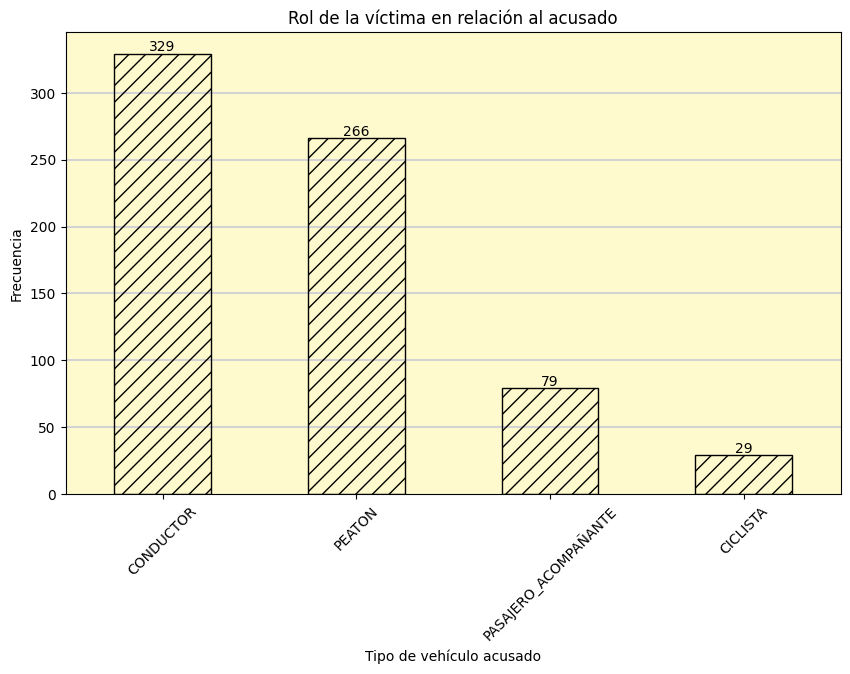

Valores del gr√°fico de ROL
CONDUCTOR               329
PEATON                  266
PASAJERO_ACOMPA√ëANTE     79
CICLISTA                 29
Name: count, dtype: int64


In [50]:
frecuencia_acusado = df_homicidios['ROL'].value_counts()
plt.figure(figsize=(10, 6))
frecuencia_acusado.plot(kind='bar', color='none', edgecolor='black', hatch='//')
plt.title('Rol de la v√≠ctima en relaci√≥n al acusado')
plt.xlabel('Tipo de veh√≠culo acusado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.gca().set_facecolor('lemonchiffon')
for i in range(50, max(frecuencia_acusado), 50):
    plt.axhline(y=i, color='lightgray', zorder=0)
for i, valor in enumerate(frecuencia_acusado):
    plt.text(i, valor, str(valor), ha='center', va='bottom')
plt.show()

print("Valores del gr√°fico de", frecuencia_acusado)

se observa que los roles de v√≠ctima m√°s comunes son:
*   Conductores, se podr√≠a asumir que una porci√≥n importante de los veh√≠culos no cuentan con pasajeros, por lo que el √∫nico accidentado podr√≠a ser el conductor, tambi√©n se podr√≠a considerar que es posible que el conductor no lleve el cintur√≥n de seguridad y los pasajeros si.
*   Peatones, una gran cantidad de las v√≠ctimas letales son peatones, quienes no tienen mayor protecci√≥n durante los accidentes.
*   Pasajero acompa√±ante, en menor medida, una cantidad de los accidentes fatales involucran pasajeros, es notable que esta proporci√≥n es de un 24%, aproximadamente 1 de cada 4 accidentes donde fallece un conductor, tambi√©n fallece un acompalante.

Otra observaci√≥n importante, es que alredeedor del 84% de las v√≠ctimas son conductores o peatones, si consideramos los pasajeros, aumenta al 96%

**Conclusi√≥n Temporal**

Los datos son claros, una mayor√≠a de las v√≠ctimas de accidentes fatales de conducci√≥n son los mismos conductores, esto recalca la necesidad de la conducci√≥n a la defensiva, tanto como del uso del cintur√≥n, no s√≥lo en horarios de madrugada que podr√≠an considerarse comunmente como m√°s peligrosos, sino que a toda hora, particularmente son los conductores j√≥venes, quienes son m√°s propensos a √©stos accidentes, por lo que tambi√©n hay que reforzar la conciencia social sobre la responsabilidad al volante y quiz√°s aumentar la exigencia a la hora de conseguir licencia de conducci√≥n.

### Sexo de la v√≠ctima en accidentes fatales

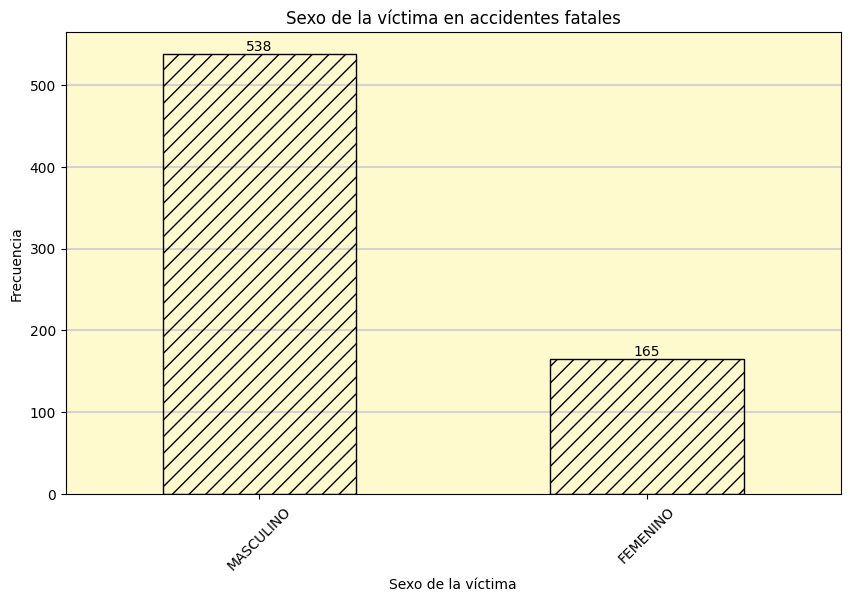

Valores del gr√°fico de SEXO
MASCULINO    538
FEMENINO     165
Name: count, dtype: int64


In [55]:
frecuencia_acusado = df_homicidios['SEXO'].value_counts()
plt.figure(figsize=(10, 6))
frecuencia_acusado.plot(kind='bar', color='none', edgecolor='black', hatch='//')
plt.title('Sexo de la v√≠ctima en accidentes fatales')
plt.xlabel('Sexo de la v√≠ctima')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.gca().set_facecolor('lemonchiffon')
for i in range(100, max(frecuencia_acusado), 100):
    plt.axhline(y=i, color='lightgray', zorder=0)
for i, valor in enumerate(frecuencia_acusado):
    plt.text(i, valor, str(valor), ha='center', va='bottom')
plt.show()

print("Valores del gr√°fico de", frecuencia_acusado)

Se observa que mayormente son los hombres quienes fallecen m√°s en accidentes fatales, esto podr√≠a deberse a que normalmente hay m√°s conductores hombres, como tambi√©n podr√≠a deberse a un exceso de confianza al volante. 
No es menor que la proporci√≥n es de 3 accidentes fatales en hombres por cada 1 de mujeres, m√°s precisamente, un 76,55% de fatalidades son de hombres, mientras que un 23,45% son de mujeres, esto es m√°s llamativo, considerando que, seg√∫n un estudio en 2018 sobre seguridad vial realizado por el ministrerio de transporte de Argentina (https://www.argentina.gob.ar/sites/default/files/2018/12/ansv_informe-con-perspectiva-de-genero-en-argentina-marzo-2023.pdf, pag 2), un 35% de las licencias de conducir vigentes pertenecen a mujeres, mientras que un 65% pertenecen a hombres.
Si bien, la proporci√≥n de accidentes es de 3 a 1, la cantidad de licencias es de 2 a 1, por lo que se destaca que los hombres sufren m√°s accidentes viales fatales que las mujeres, tanto como un valor absoluto, como en proporci√≥n a cantidad de conductores.

**Conclusi√≥n Temporal**

El foco principal para disminuir los accidentes viales fatales, seg√∫n los datos, ser√≠an los hombres jovenes, entre 25 y 35 a√±os, principalmente solteros, este grupo es el que m√°s propenso est√° a ser v√≠ctima en un accidente vial fatal.

Ser√≠a importante para reducir la cantidad de accidentes, hacer una campa√±a de concientizaci√≥n sobre el uso de cintur√≥n de seguridad, as√≠ como aumentar los requisitos para conseguir licencia de conducci√≥n, lamentablemente el factor principal en una gran cantidad de accidentes sigue siendo el conductor, y la inexperiencia al volante puede llevar a muchos a tomar decisiones equivocadas.

## **An√°lisis Monovariado df_lesiones**

Se analizar√°n los datos complementarios en b√∫squeda de conclusiones que agreguen informaci√≥n significativa a las observaciones anteriores.

### Hora de Accidente

In [ ]:
frecuencia_acusado = df_homicidios['SEXO'].value_counts()
plt.figure(figsize=(10, 6))
frecuencia_acusado.plot(kind='bar', color='none', edgecolor='black', hatch='//')
plt.title('Sexo de la v√≠ctima en accidentes fatales')
plt.xlabel('Sexo de la v√≠ctima')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.gca().set_facecolor('lemonchiffon')
for i in range(100, max(frecuencia_acusado), 100):
    plt.axhline(y=i, color='lightgray', zorder=0)
for i, valor in enumerate(frecuencia_acusado):
    plt.text(i, valor, str(valor), ha='center', va='bottom')
plt.show()

print("Valores del gr√°fico de", frecuencia_acusado)

Se observa que mayormente son los hombres quienes fallecen m√°s en accidentes fatales, esto podr√≠a deberse a que normalmente hay m√°s conductores hombres, como tambi√©n podr√≠a deberse a un exceso de confianza al volante. 
No es menor que la proporci√≥n es de 3 accidentes fatales en hombres por cada 1 de mujeres, m√°s precisamente, un 76,55% de fatalidades son de hombres, mientras que un 23,45% son de mujeres, esto es m√°s llamativo, considerando que, seg√∫n un estudio en 2018 sobre seguridad vial realizado por el ministrerio de transporte de Argentina (https://www.argentina.gob.ar/sites/default/files/2018/12/ansv_informe-con-perspectiva-de-genero-en-argentina-marzo-2023.pdf, pag 2), un 35% de las licencias de conducir vigentes pertenecen a mujeres, mientras que un 65% pertenecen a hombres.
Si bien, la proporci√≥n de accidentes es de 3 a 1, la cantidad de licencias es de 2 a 1, por lo que se destaca que los hombres sufren m√°s accidentes viales fatales que las mujeres, tanto como un valor absoluto, como en proporci√≥n a cantidad de conductores.

**Conclusi√≥n Temporal**

El foco principal para disminuir los accidentes viales fatales, seg√∫n los datos, ser√≠an los hombres jovenes, entre 25 y 35 a√±os, principalmente solteros, este grupo es el que m√°s propenso est√° a ser v√≠ctima en un accidente vial fatal.

Ser√≠a importante para reducir la cantidad de accidentes, hacer una campa√±a de concientizaci√≥n sobre el uso de cintur√≥n de seguridad, as√≠ como aumentar los requisitos para conseguir licencia de conducci√≥n, lamentablemente el factor principal en una gran cantidad de accidentes sigue siendo el conductor, y la inexperiencia al volante puede llevar a muchos a tomar decisiones equivocadas.

## Analisis Bivariado

In [56]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 716
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     706 non-null    object        
 1   ACUSADO                689 non-null    object        
 2   FECHA                  706 non-null    datetime64[ns]
 3   HORA                   706 non-null    datetime64[ns]
 4   COMUNA                 706 non-null    int8          
 5   LUGAR_DEL_HECHO        706 non-null    object        
 6   TIPO_DE_CALLE          706 non-null    object        
 7   Calle                  706 non-null    object        
 8   Altura                 130 non-null    float32       
 9   Cruce                  535 non-null    object        
 10  Direcci√≥n Normalizada  698 non-null    object        
 11  pos x                  695 non-null    float32       
 12  pos y                  695 non-null    float32       
 13  N_VICTIMA

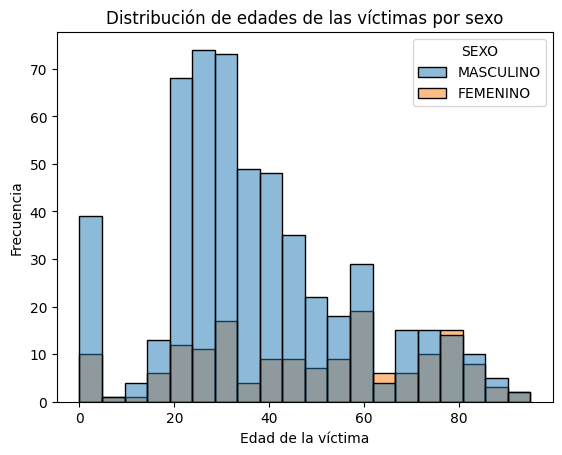

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_homicidios, x='EDAD', hue='SEXO', bins=20)
plt.xlabel('Edad de la v√≠ctima')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de edades de las v√≠ctimas por sexo')
plt.show()


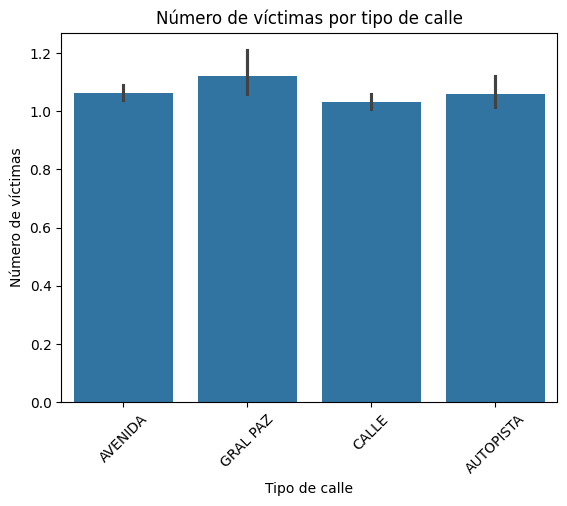

In [59]:
sns.barplot(data=df_homicidios, x='TIPO_DE_CALLE', y='N_VICTIMAS')
plt.xlabel('Tipo de calle')
plt.ylabel('N√∫mero de v√≠ctimas')
plt.title('N√∫mero de v√≠ctimas por tipo de calle')
plt.xticks(rotation=45)
plt.show()


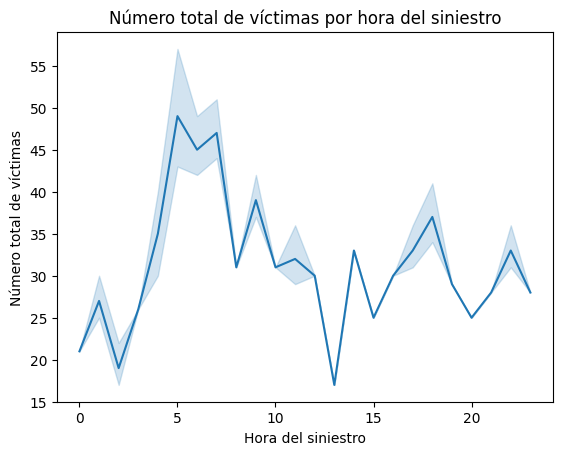

In [60]:
df_homicidios['HORA'] = df_homicidios['HORA'].dt.hour
sns.lineplot(data=df_homicidios, x='HORA', y='N_VICTIMAS', estimator=sum)
plt.xlabel('Hora del siniestro')
plt.ylabel('N√∫mero total de v√≠ctimas')
plt.title('N√∫mero total de v√≠ctimas por hora del siniestro')
plt.show()


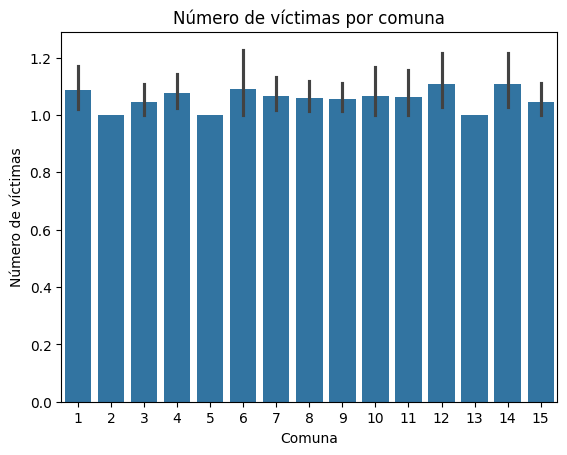

In [61]:
sns.barplot(data=df_homicidios, x='COMUNA', y='N_VICTIMAS')
plt.xlabel('Comuna')
plt.ylabel('N√∫mero de v√≠ctimas')
plt.title('N√∫mero de v√≠ctimas por comuna')
plt.show()


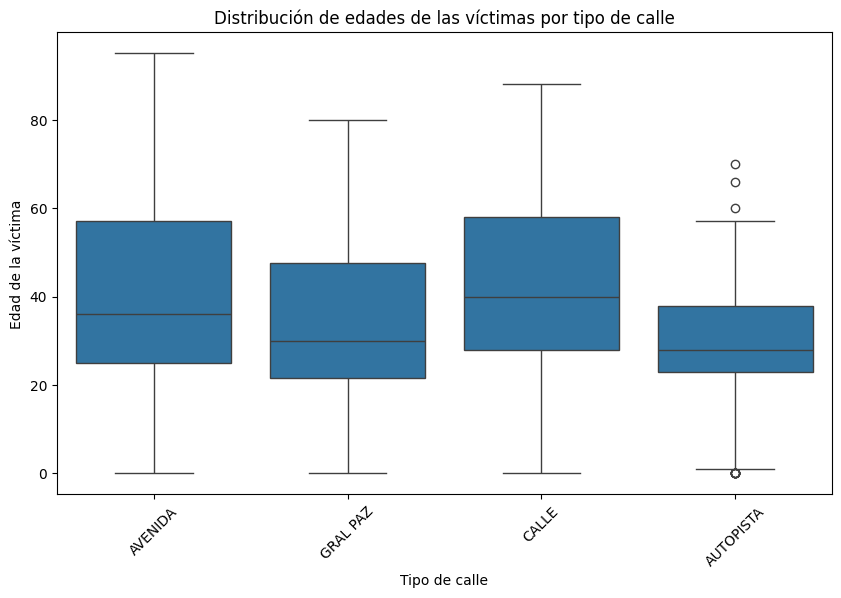

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_homicidios, x='TIPO_DE_CALLE', y='EDAD')
plt.xlabel('Tipo de calle')
plt.ylabel('Edad de la v√≠ctima')
plt.title('Distribuci√≥n de edades de las v√≠ctimas por tipo de calle')
plt.xticks(rotation=45)
plt.show()


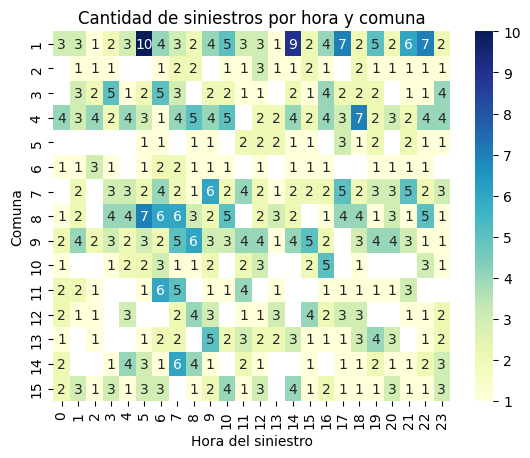

In [65]:
pivot_table = df_homicidios.pivot_table(index='COMUNA', columns='HORA', values='ID', aggfunc='count')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.xlabel('Hora del siniestro')
plt.ylabel('Comuna')
plt.title('Cantidad de siniestros por hora y comuna')
plt.show()



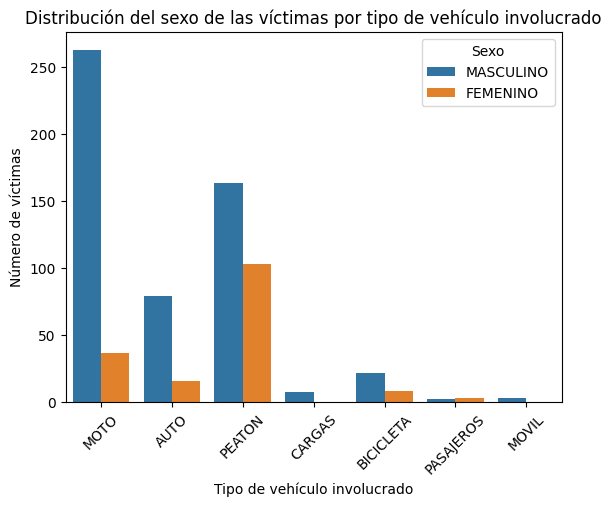

In [66]:
sns.countplot(data=df_homicidios, x='VICTIMA', hue='SEXO')
plt.xlabel('Tipo de veh√≠culo involucrado')
plt.ylabel('N√∫mero de v√≠ctimas')
plt.title('Distribuci√≥n del sexo de las v√≠ctimas por tipo de veh√≠culo involucrado')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.show()


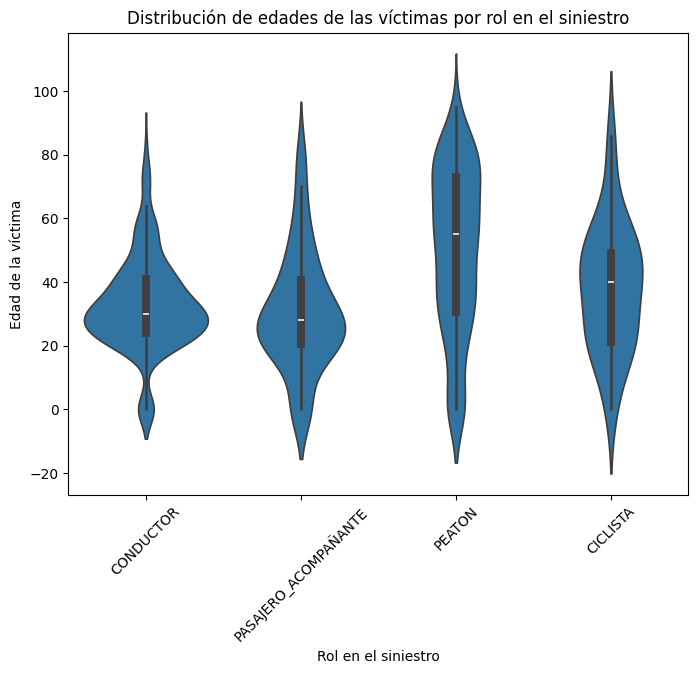

In [67]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_homicidios, x='ROL', y='EDAD')
plt.xlabel('Rol en el siniestro')
plt.ylabel('Edad de la v√≠ctima')
plt.title('Distribuci√≥n de edades de las v√≠ctimas por rol en el siniestro')
plt.xticks(rotation=45)
plt.show()


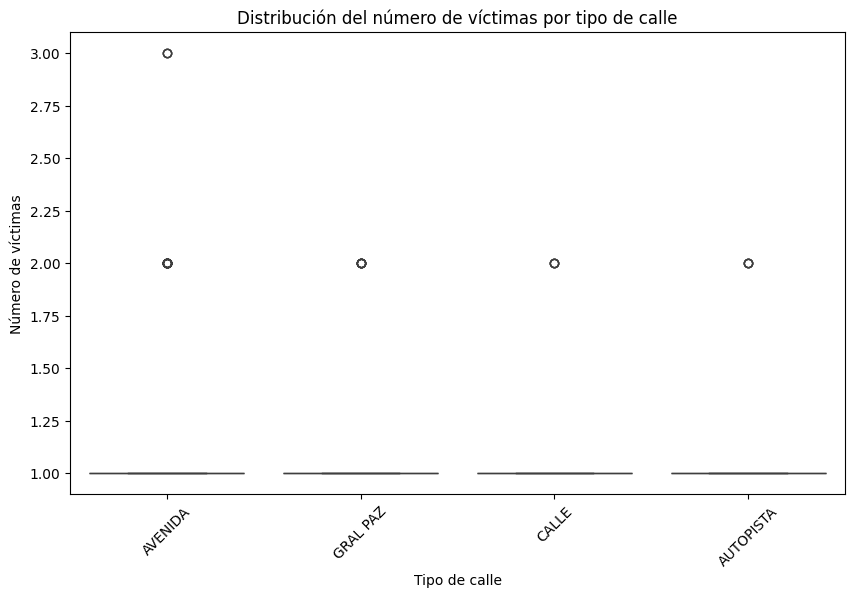

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_homicidios, x='TIPO_DE_CALLE', y='N_VICTIMAS')
plt.xlabel('Tipo de calle')
plt.ylabel('N√∫mero de v√≠ctimas')
plt.title('Distribuci√≥n del n√∫mero de v√≠ctimas por tipo de calle')
plt.xticks(rotation=45)
plt.show()


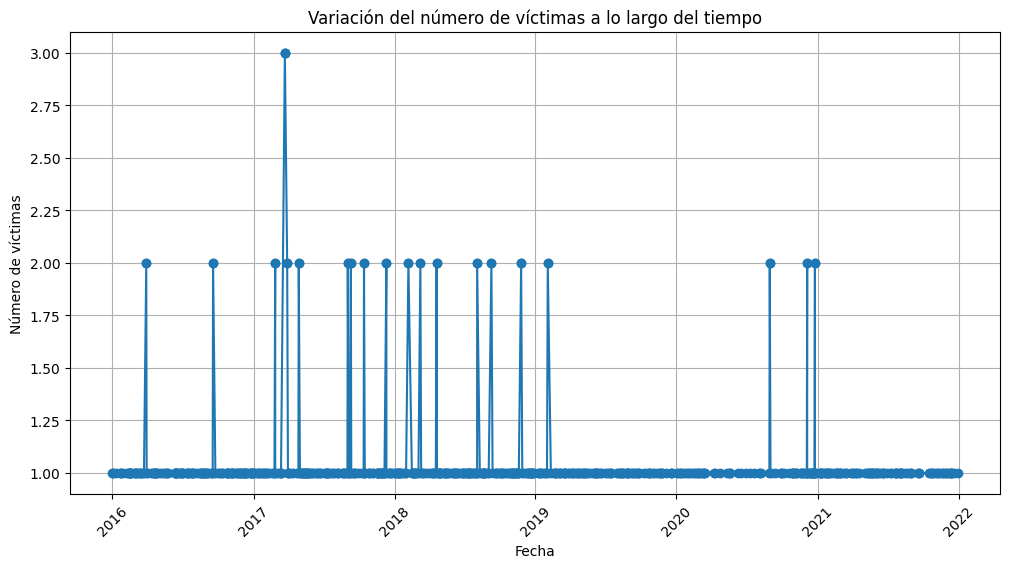

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(df_homicidios['FECHA'], df_homicidios['N_VICTIMAS'], marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('N√∫mero de v√≠ctimas')
plt.title('Variaci√≥n del n√∫mero de v√≠ctimas a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


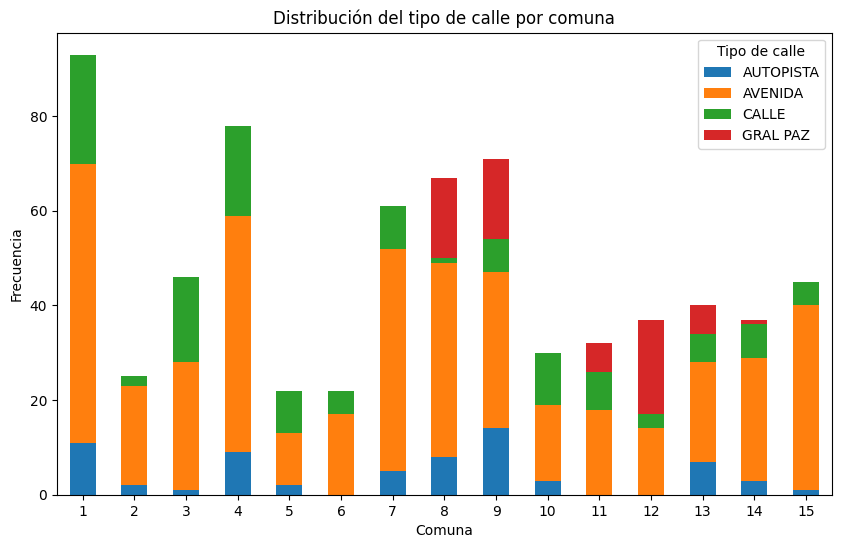

In [70]:
comuna_tipo_calle = pd.crosstab(index=df_homicidios['COMUNA'], columns=df_homicidios['TIPO_DE_CALLE'])
comuna_tipo_calle.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n del tipo de calle por comuna')
plt.xticks(rotation=0)
plt.legend(title='Tipo de calle')
plt.show()


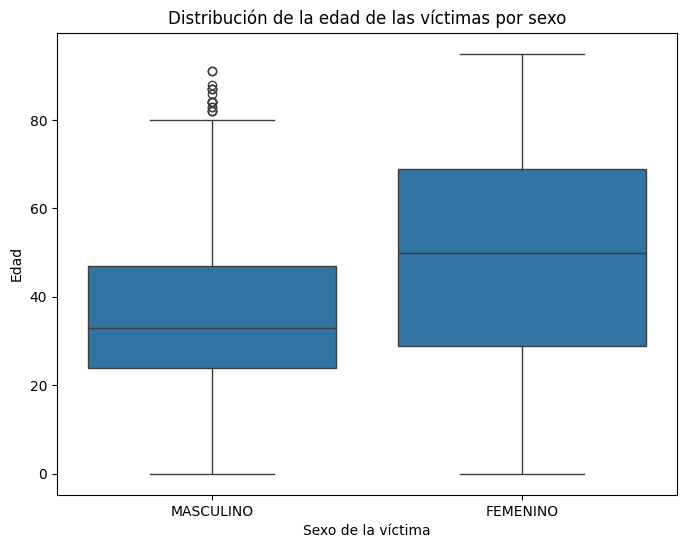

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_homicidios, x='SEXO', y='EDAD')
plt.xlabel('Sexo de la v√≠ctima')
plt.ylabel('Edad')
plt.title('Distribuci√≥n de la edad de las v√≠ctimas por sexo')
plt.show()


# con 20 lineas de ejemplo

In [73]:
extracto_aleatorio = df_homicidios.sample(n=20, random_state=42)
print(extracto_aleatorio)


            ID      ACUSADO      FECHA  HORA  COMUNA  \
488  2019-0054  OBJETO FIJO 2019-06-20     3      15   
83   2016-0109  OBJETO FIJO 2016-08-24     5       9   
79   2016-0104    PASAJEROS 2016-08-14    21       9   
216  2017-0084    PASAJEROS 2017-07-05    12       2   
329  2018-0041    PASAJEROS 2018-04-27    13       4   
336  2018-0048    PASAJEROS 2018-05-09    10       7   
257  2017-0129    PASAJEROS 2017-10-26    19       9   
334  2018-0046         AUTO 2018-05-02     3       9   
631  2021-0012         AUTO 2021-01-29    20       8   
125  2016-0155         AUTO 2016-11-26    16      10   
164  2017-0026  OBJETO FIJO 2017-02-26     5       4   
172  2017-0034         AUTO 2017-03-13     7      14   
406  2018-0116       CARGAS 2018-11-01    10       8   
287  2018-0002    PASAJEROS 2018-01-03    16       1   
240  2017-0110    PASAJEROS 2017-09-06    14       1   
123  2016-0153         MOTO 2016-11-25    15      15   
138  2016-0171         MOTO 2016-12-25    19    

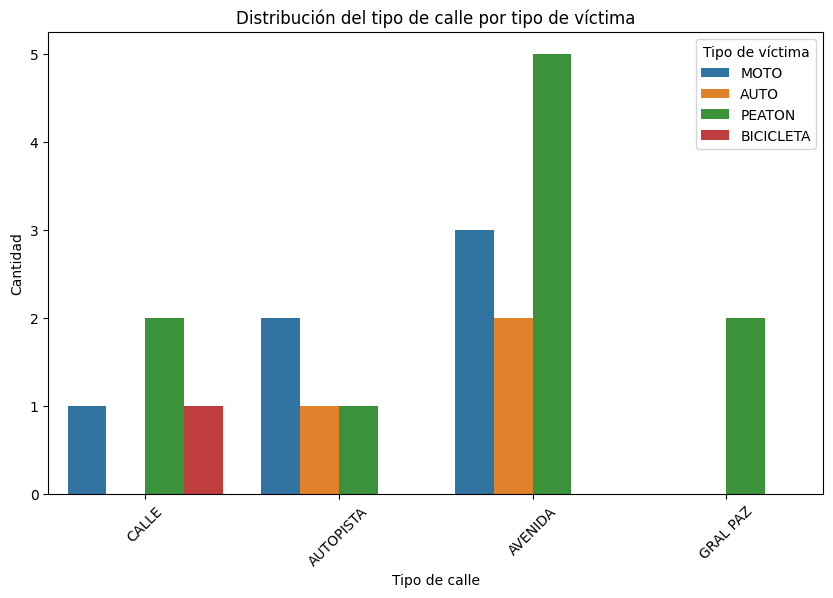

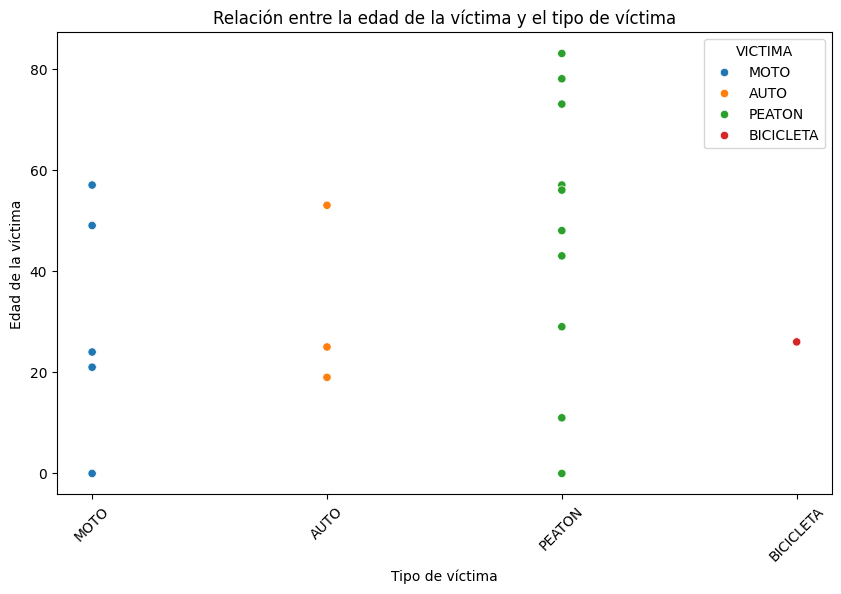

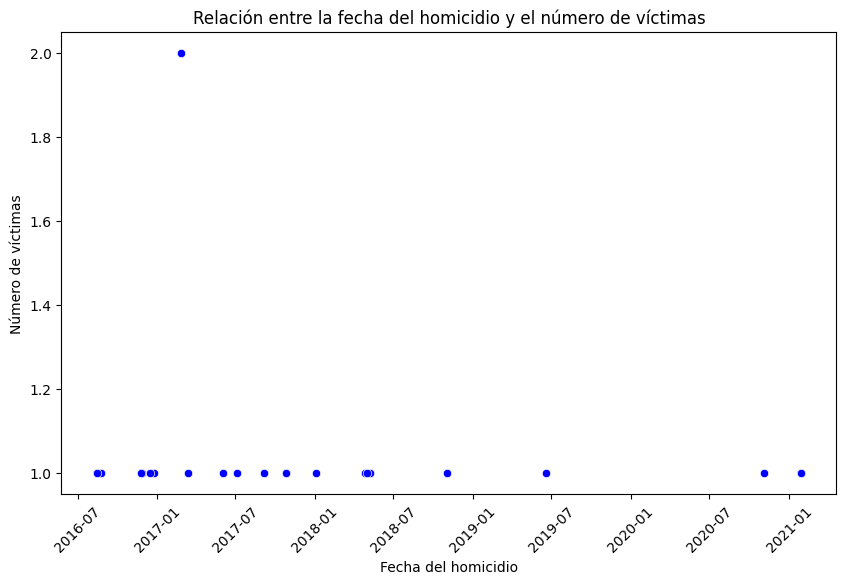

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comparaci√≥n entre el tipo de v√≠ctima y el tipo de calle
plt.figure(figsize=(10, 6))
sns.countplot(data=extracto_aleatorio, x='TIPO_DE_CALLE', hue='VICTIMA')
plt.title('Distribuci√≥n del tipo de calle por tipo de v√≠ctima')
plt.xlabel('Tipo de calle')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Tipo de v√≠ctima')
plt.show()

# Comparaci√≥n entre la edad de la v√≠ctima y el tipo de v√≠ctima
plt.figure(figsize=(10, 6))
sns.scatterplot(data=extracto_aleatorio, x='VICTIMA', y='EDAD', hue='VICTIMA')
plt.title('Relaci√≥n entre la edad de la v√≠ctima y el tipo de v√≠ctima')
plt.xlabel('Tipo de v√≠ctima')
plt.ylabel('Edad de la v√≠ctima')
plt.xticks(rotation=45)
plt.show()

# Comparaci√≥n entre la fecha del homicidio y el n√∫mero de v√≠ctimas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=extracto_aleatorio, x='FECHA', y='N_VICTIMAS', color='blue')
plt.title('Relaci√≥n entre la fecha del homicidio y el n√∫mero de v√≠ctimas')
plt.xlabel('Fecha del homicidio')
plt.ylabel('N√∫mero de v√≠ctimas')
plt.xticks(rotation=45)
plt.show()


# **EDA**

Exploraci√≥n bivariada:

Examina la relaci√≥n entre pares de variables.
Utiliza gr√°ficos de dispersi√≥n para identificar posibles correlaciones entre variables num√©ricas.
Para variables categ√≥ricas, utiliza tablas de contingencia y gr√°ficos de barras apiladas para analizar su relaci√≥n.
Exploraci√≥n multivariada:

Analiza simult√°neamente tres o m√°s variables.
Utiliza mapas de calor de correlaci√≥n para visualizar la correlaci√≥n entre m√∫ltiples variables num√©ricas.
Emplea t√©cnicas de clustering o an√°lisis factorial si es necesario para comprender la estructura de los datos.
Visualizaci√≥n de datos:

Utiliza una variedad de gr√°ficos y visualizaciones para comunicar tus hallazgos de manera efectiva.
Utiliza bibliotecas como Matplotlib, Seaborn y Plotly para crear gr√°ficos informativos y atractivos.
Interpretaci√≥n de resultados:

Comprende las implicaciones de tus hallazgos en el contexto del problema que est√°s abordando.
Formula hip√≥tesis basadas en tus observaciones y prepara la base para an√°lisis y modelado m√°s avanzados.
Documentaci√≥n:

Documenta todos los pasos que has seguido y los resultados obtenidos.
Esto ayudar√° a ti y a otros a entender y replicar tu an√°lisis en el futuro.
Realizar un EDA completo y exhaustivo te proporcionar√° una comprensi√≥n s√≥lida de tus datos, lo que te permitir√° tomar decisiones informadas en pasos posteriores de tu proyecto de ciencia de datos.

# KPI

In [76]:
import pandas as pd

# Explorar la estructura y primeras filas de los datos
print(df_homicidios.info())
print(df_homicidios.head())


<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 716
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     706 non-null    object        
 1   ACUSADO                689 non-null    object        
 2   FECHA                  706 non-null    datetime64[ns]
 3   HORA                   706 non-null    int32         
 4   COMUNA                 706 non-null    int8          
 5   LUGAR_DEL_HECHO        706 non-null    object        
 6   TIPO_DE_CALLE          706 non-null    object        
 7   Calle                  706 non-null    object        
 8   Altura                 130 non-null    float32       
 9   Cruce                  535 non-null    object        
 10  Direcci√≥n Normalizada  698 non-null    object        
 11  pos x                  695 non-null    float32       
 12  pos y                  695 non-null    float32       
 13  N_VICTIMA

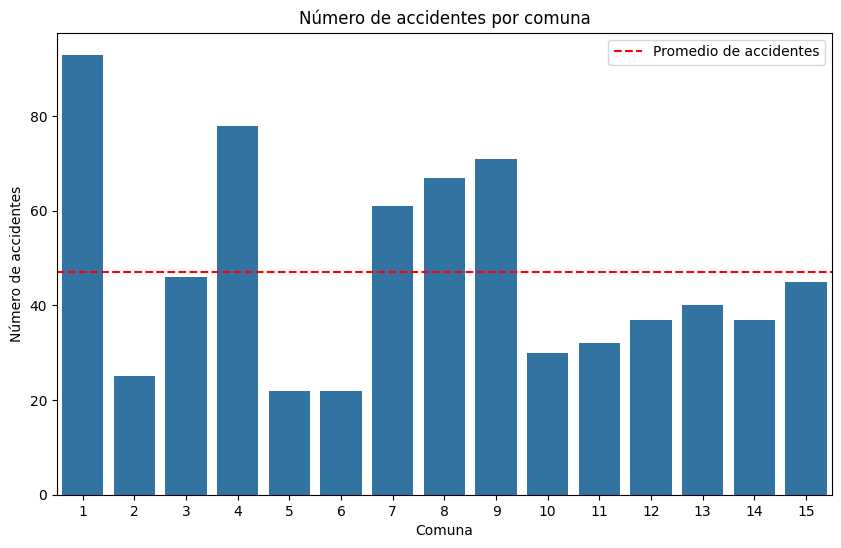

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el n√∫mero de accidentes por comuna
accidentes_por_comuna = df_homicidios['COMUNA'].value_counts()

# Calcular el promedio de accidentes por comuna
promedio_accidentes = accidentes_por_comuna.mean()

# Visualizar la distribuci√≥n de accidentes por comuna
plt.figure(figsize=(10, 6))
sns.barplot(x=accidentes_por_comuna.index, y=accidentes_por_comuna.values)
plt.axhline(y=promedio_accidentes, color='r', linestyle='--', label='Promedio de accidentes')  # Agregar l√≠nea horizontal
plt.title('N√∫mero de accidentes por comuna')
plt.xlabel('Comuna')
plt.ylabel('N√∫mero de accidentes')
plt.legend()
plt.show()


In [78]:
# Calcular el promedio de accidentes fatales
promedio_accidentes_fatales = df_homicidios['N_VICTIMAS'].mean()

print("Promedio de accidentes fatales:", promedio_accidentes_fatales)


Promedio de accidentes fatales: 1.0623229461756374


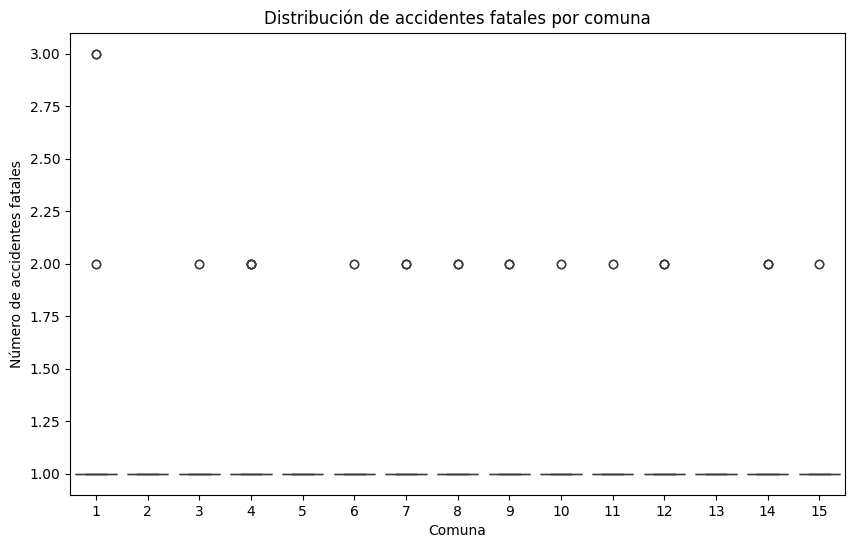

In [79]:
# Filtrar las comunas por encima del promedio de accidentes fatales
comunas_sobre_promedio = df_homicidios[df_homicidios['N_VICTIMAS'] > promedio_accidentes_fatales]['COMUNA']

# Visualizar un gr√°fico de cajas y bigotes para las comunas sobre el promedio
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_homicidios, x='COMUNA', y='N_VICTIMAS')
plt.title('Distribuci√≥n de accidentes fatales por comuna')
plt.xlabel('Comuna')
plt.ylabel('N√∫mero de accidentes fatales')
plt.show()


In [83]:
# Calcular el total de accidentes fatales en todas las comunas
total_accidentes_fatales = df_homicidios['N_VICTIMAS'].sum()

# Calcular porcentajes de accidentes fatales por comuna
porcentajes_accidentes_fatales = (df_homicidios.groupby('COMUNA')['N_VICTIMAS'].sum() / total_accidentes_fatales) * 100

print("Porcentajes de accidentes fatales por comuna:")
print(porcentajes_accidentes_fatales)


Porcentajes de accidentes fatales por comuna:
COMUNA
1     13.466667
2      3.333333
3      6.400000
4     11.200000
5      2.933333
6      3.200000
7      8.666667
8      9.466667
9     10.000000
10     4.266667
11     4.533333
12     5.466667
13     5.333333
14     5.466667
15     6.266667
Name: N_VICTIMAS, dtype: float64


----

# **Enunciado Henry**


Las tasas de mortalidad relacionadas con siniestros viales suelen ser calculadas como el n√∫mero de muertes por cada cierto n√∫mero de habitantes o por cada cierta cantidad de veh√≠culos registrados.


## **Contexto**


En Argentina, cada a√±o mueren cerca de 4.000 personas en siniestros viales, Aunque se ha logrado disminuir la cantidad de accidentes de tr√°nsito, esta sigue siendo la principal causa de muertes en el pa√≠s.
Los informes del Sistema Nacional de Informaci√≥n Criminal (SNIC), del Ministerio de Seguridad de la Naci√≥n, revelan que entre 2018 y 2022 se registraron 19.630 muertes en siniestros viales en todo el pa√≠s. Estas cifras equivalen a 11 personas por d√≠a.

Solo en 2022, se contabilizaron 3.828 muertes fatales en este tipo de hechos. Los expertos en la materia indican que en Argentina es dos o tres veces m√°s alta la probabilidad de que una persona muera en un siniestro vial que en un hecho de inseguridad delictiva


## **Rol a desarrollar**


El `Observatorio de Movilidad y Seguridad Vial` (OMSV), centro de estudios que se encuentra bajo la √≥rbita de la **_Secretar√≠a de Transporte_** del Gobierno de la Ciudad Aut√≥noma de Buenos Aires, nos solicita la elaboraci√≥n de un proyecto de an√°lis de datos, con el fin de generar informaci√≥n que le permita a las autoridades locales tomar medidas para disminuir la cantidad de v√≠ctimas fatales de los siniestros viales.
Para ello, nos disponibilizan un dataset sobre homicidios en siniestros viales acaecidos en la Ciudad de Buenos Aires durante el periodo 2016-2021. Este dataset se encuentra en formato _xlsx_ y contiene dos hojas llamadas: **hechos** y **v√≠ctimas**. Asimismo, observar√°n que incluye otras dos hojas adicionales de diccionarios de datos, que les podr√° servir de gu√≠a para un mayor entendimiento de la data compartida.


# **Propuesta de trabajo -m√≠nimos entregables-**


_Es importante que a la hora de empezar a desarrollar cada item, y tu demo, te ayudes tambien de la [r√∫brica de evaluaci√≥n](https://docs.google.com/spreadsheets/d/e/2PACX-1vTy9Ome3iLIl40SZ2jciZLiwARr9MVXfo_Mud3vVCin9P4zroAw_oxVQVch6m4TKivmUjFrYJKMJJhS/pubhtml)._ üòÑ


## `EDA` (Exploratory Data Analysis)


Debes realizar un an√°lisis exploratorio de los datos en un notebook. Tienen que estar tus pasos documentados con claridad, con las conclusiones correspondientes en cada gr√°fico empleado y an√°lisis de lo que vas observando, utilizando celdas Markdown para tal fin. La prolijidad del notebook ser√° un aspecto a evaluar. Es importante que tengas en cuenta que, en muchas oportunidades y trabajos, un EDA constituye un entregable en s√≠ mismo.

En esta l√≠nea, hay varios aspectos indispensables que **deben** ser abordados en cualquier An√°lisis Exploratorio de Datos y tomaremos como punto de partida para evaluar tu performance en este apartado. Entre estos aspectos destacados se encuentran: _b√∫squeda de valores faltantes, valores at√≠picos/extremos u outliers y registros duplicados_. Asimismo, la utilizaci√≥n de gr√°ficos coherentes seg√∫n la tipolog√≠a de variable que corresponda resulta esencial.

**_En caso de hacer uso de librer√≠as como pandas_profiling, es indispensable acompa√±ar los gr√°ficos con an√°lisis propios._**

- Revisar por Estacionalidad

- [dale un vistazo al workshop de preprocesamiento](https://www.app.soyhenry.com/lecture/dc30f5d1-573e-4f65-a7c6-7058eabcbcf4)

* La elecci√≥n de gr√°ficas se corresponde al tipo de variable y representa apropiadamente lo que pretende. Contiene todos los elementos visuales adecuados para lograr una comunicaci√≥n efectiva: el estilo es uniforme/consistente, la escala utilizada es adecuada y los titulos de ejes y etiquetas son descriptivos. Adem√°s, el idioma y la denominaci√≥n de las variables se encuentran unificados.

* "EDA en notebook completo: aborda outliers, duplicados, valores faltantes y gr√°ficos pertinentes con el tipo de variable (cualitativa/cuantitativa) demostrando que comprende la diferencia entre ambas.

* Cada gr√°fico est√° acompa√±ado de an√°lisis profundos y conclusiones acordes a lo que se est√° analizando.

* Se hace uso completo de markdowns para documentar el an√°lisis, siguiendo un paso a paso estructurado y justificando las decisiones tomadas. El notebook contiene todos los outputs ejecutados y se evitan mensajes de ""warnings"", asegurando un an√°lisis exhaustivo y sin interrupciones. "


## `Dashboard`


Debe ser funcional y coherente con el storytelling. El dasbhoard tiene que incluir **filtros**, permitiendo explorar detalladamente los datos con la selecci√≥n de cada uno de ellos. Es decir, es indispensable que sea **interactivo**. Tambi√©n, se espera que el dise√±o que implementen facilite la interpretaci√≥n de la informaci√≥n y su an√°lisis, siendo importante, para ello, la claridad en la presentaci√≥n de los datos, aspectos inherentes a la esteticidad, elecci√≥n coherente de los gr√°ficos seg√∫n las variables a visualizar, entre otros √≠tems.

- [Utiliza el workshop de streamlit para aprender](https://www.app.soyhenry.com/lecture/dc30f5d1-573e-4f65-a7c6-7058eabcbcf4)
- [Debes ver el workshop de Data to Viz y Storytelling, ayudar√° a crear el dashboard](https://www.app.soyhenry.com/lecture/dc30f5d1-573e-4f65-a7c6-7058eabcbcf4)
- El Dashboard refleja lo del eda, pero m√°s boniti
- Considera agregar botones de navegaci√≥n, dan un plus
- Hacerlo en modo obscuro(?) (ser√° mejor hacerlo cambiable?)
- KPi primero o despu√©s? qu√© quiero para mi Storytelling?

* El dashboard es altamente interactivo: los filtros, selecciones y acciones implementadas son eficientes y se pueden utilizar estrat√©gicamente para mostrar informaci√≥n clave y agregar valor el an√°lisis. Adem√°s, la UX es positiva: su navegaci√≥n es intuituva y la comprensi√≥n de las funciones no requiere instrucciones adicionales
* Demuestra una clara comprensi√≥n del prop√≥sito de un dashboard como un tablero de control. Muestra una visi√≥n general de los datos y proporciona informaci√≥n clave para la toma de decisiones. El dashboard est√° dise√±ado de manera coherente con ese prop√≥sito y se enfoca en los indicadores clave relevantes para el an√°lisis y el planteamiento del rendimiento respecto al objetivo (KPIs bien representados).
* La disposici√≥n y el dise√±o de la informaci√≥n es excelente y facilita su comprensi√≥n. Los elementos est√°n alineados y la elecci√≥n de colores y tipograf√≠a son consitentes a lo largo de todo el dashboard, facilitando la legibilidad de la informaci√≥n y creado una visual ordenada y de apariencia profesional. Adem√°s, se uitlizan t√©cnicas de dise√±o (como tama√±o, color, posici√≥n) de forma estrat√©gica, logrando guiar la atenci√≥n del usuario hacia la informaci√≥n relevante.
* La elecci√≥n de gr√°ficas se corresponde al tipo de variable y representa apropiadamente lo que pretende. Contiene todos los elementos visuales adecuados para lograr una comunicaci√≥n efectiva: el estilo es uniforme/consistente, la escala utilizada es adecuada y los titulos de ejes y etiquetas son descriptivos. Adem√°s, el idioma y la denominaci√≥n de las variables se encuentran unificados.


## `An√°lisis` :warning:


No se considerar√° solamente la producci√≥n de gr√°ficos con datos -dashboard-, sino tambi√©n los an√°lisis y conclusiones que puedan extraer a partir de ellos.


## `KPIs`


Debes graficar y medir los 2 KPIs propuestos a continuaci√≥n, represent√°ndolos adecuadamente en el dashboard. A su vez, tamb√≠en tienes que proponer, medir y graficar un tercer KPI que consideres relevante para la tem√°tica.
Los dos KPIs propuestos son:

- _Reducir en un 10% la tasa de homicidios en siniestros viales de los √∫ltimos seis meses, en Ciudad Aut√≥noma de Buenos Aires (CABA), en comparaci√≥n con la tasa de homicidios en siniestros viales del semestre anterior_.

  Definimos a la **tasa de homicidios en siniestros viales** como el n√∫mero de v√≠ctimas fatales en accidentes de tr√°nsito por cada 100,000 habitantes en un √°rea geogr√°fica durante un per√≠odo de tiempo espec√≠fico.
  Su f√≥rmula es: (N√∫mero de homicidios en siniestros viales / Poblaci√≥n total) \* 100,000

- _Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el √∫ltimo a√±o, en Ciudad Aut√≥noma de Buenos Aires (CABA), respecto al a√±o anterior_.

  Definimos a la **cantidad de accidentes mortales de motociclistas en siniestros viales** como el n√∫mero absoluto de accidentes fatales en los que estuvieron involucradas v√≠ctimas que viajaban en moto en un determinado periodo temporal.
  Su f√≥rmula para medir la evoluci√≥n de los accidentes mortales con v√≠ctimas en moto es: (N√∫mero de accidentes mortales con v√≠ctimas en moto en el a√±o anterior - N√∫mero de accidentes mortales con v√≠ctimas en moto en el a√±o actual) / (N√∫mero de accidentes mortales con v√≠ctimas en moto en el a√±o anterior) \* 100

`MUY IMPORTANTE` repasar qu√© es un KPI y c√≥mo se diferencia de una m√©trica convencional. En el material de apoyo tienen lectura que puede ser de ayuda.</small>

- Se utilizan como m√≠nimo 3 KPIs de manera adecuada y se integran en el dashboard del proyecto de an√°lisis de datos. El estudiante puede explicar y defender la elecci√≥n y utilizaci√≥n de los KPIs seleccionados.

- Adem√°s, demuestra un s√≥lido entendimiento de la distinci√≥n conceptual entre m√©trica y KPI, evidenciado por la correcta selecci√≥n de visualizaci√≥n para cada KPI, utilizando gr√°ficos o representaciones visuales apropiadas.

MI KPI!!!!

- Buscar la comuna con m√°s accidentes
- Buscar las comunas por sobre el promedio
- Aplicar Valores y Porcentajes
- Piensa en Cajas y Bigotes


## `Repositorio de GitHub`


El repositorio debe contener un **Readme** principal donde presenten, en una primera instancia, de forma general **su proyecto** y detallen qu√© hay en cada archivo/carpeta del propio repositorio. Este Readme no puede ser el mismo de la consigna que nosotros les entregamos.
A su vez, el Readme debe incluir un **reporte de an√°lisis con base en sus dashboards**, as√≠ como el an√°lisis y la funcionalidad de los KPIs sugeridos.

- El Readme.md del proyecto va m√°s all√° de los requisitos m√≠nimos. Proporciona una descripci√≥n detallada y completa del proyecto, incluyendo una presentaci√≥n clara y concisa del mismo. Se mencionan las tecnolog√≠as y herramientas utilizadas en el proyecto, as√≠ como la metodolog√≠a aplicada de manera exhaustiva.

- Adem√°s, se presentan an√°lisis detallados y conclusiones fundamentadas que demuestran un profundo entendimiento de los datos analizados.


## _**Desaf√≠ate y no te quedes siendo Junior, s√© Junior Advanced**_


Pensando en alcanzar tu Boom üöÄ, te recomendamos incorporar los siguientes desaf√≠os para tener un portfolio mucho m√°s completo y competitivo:

- Crear una base de datos en un motor SQL, ingestar el dataset procesado y utilizarla como fuente de datos de su dashboard en Power BI (o la herramienta de visualizaci√≥n que utilice).
- Ejecutar scripts de Python en la herramienta de visualizaci√≥n de datos escogida.
- Cruce de datos con datasets complementarios, ya sea para obtener informaci√≥n nueva o poder comparar la informaci√≥n disponible para todas las plataformas.

<sub> Nota: la realizaci√≥n de uno o m√°s de estos √≠tems no es intercambiable con los requerimientos m√≠nimos establecidos en la secci√≥n anterior "Propuesta de trabajo". Empiece con esta secci√≥n una vez haya cumplido con los requerimientos m√≠nimos, a modo de desafiarse a usted mismo y destacar frente al resto.</sub>


# Fuente de datos


## **Obligatorio:**


- [Buenos Aires Data](https://data.buenosaires.gob.ar/dataset/victimas-siniestros-viales): deber√°n utilizar el dataset denominado `Homicidios`


## **Complementarios:**


- [Buenos Aires Data](https://data.buenosaires.gob.ar/dataset/victimas-siniestros-viales): pueden usar el dataset de `Lesiones`
- Cualquier dataset de b√∫squeda propia que complemente y mejore el an√°lisis. Recuerde el uso de [APIs y WebScrapping](https://www.students.soyhenry.com/classes/95?cohortId=124&videoOrdinal=2)


# Lo que tendremos en cuenta a la hora de evaluar


Ser√°s evaluado en dos grandes √°reas `Tech` y `Soft`!

Ambas con igual peso entre si y ambas deben ser aprobatorias para tener la calidad de aprobado en este PIDA. Ten presente que una nota minima para aprobar significa tener TODOS los items como "Bueno" üëå
A continuacion te facilitamos nuevamente la [r√∫brica de evaluaci√≥n](https://docs.google.com/spreadsheets/d/e/2PACX-1vTy9Ome3iLIl40SZ2jciZLiwARr9MVXfo_Mud3vVCin9P4zroAw_oxVQVch6m4TKivmUjFrYJKMJJhS/pubhtml) con la que seras evaluado por tu corrector@. Recuerda que el feedback de tu corrector@ no es en ningun momento un indicativo de tu nota. Si tienes alguna duda durante tu DEMO, pidele a tu corrector@ que te aclare claramente cuales son los objetivos de aprendizaje no cumplidos.

Esperamos que te sirva de guia de aprendizaje, y recuerda que no se trata solo de cumplir requisitos, sino de destacar en cada nivel üöÄ üíõ


## Material de apoyo


- [Notas para el uso del dataset de homicidios de siniestros viales de la CABA](https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/victimas-siniestros-viales/NOTAS_HOMICIDIOS_SINIESTRO_VIAL.pdf)
- [Observatorio de Movilidad y Seguridad Vial de la Ciudad Aut√≥noma de Buenos Aires](https://buenosaires.gob.ar/observatorio-de-movilidad-y-seguridad-vial)


## Tech


- [Repaso de clase sobre EDA](https://www.students.soyhenry.com/classes/100?cohortId=106&videoOrdinal=1)
- [Code Review: **Interactividad** Dashboard, Patron Z, **Tooltips**](https://www.students.soyhenry.com/classes/93?cohortId=124&videoOrdinal=2)
- [KPI's 4 students](https://docs.google.com/document/d/1DI0ZVgHfOfjgnXGhi8jEKzwCIjtUdgRUDe-qiiGGq8E/edit)
- [Code Review: DAX y **medidas calculadas**](https://www.students.soyhenry.com/classes/96?cohortId=124&videoOrdinal=2)


## Soft


- ¬°Todos los Workshops de esta etapa ser√°n de gran utilidad para tener un proyecto exitoso!

* [Practice to perfect](https://vimeo.com/906514592/1ae3a5de05?share=copy)

An√°lisis

- Su an√°lisis agrega un valor significativo a los datos. Logra incluir una contextualizaci√≥n s√≥lida y realiza cruces de datos con otras fuentes relevantes. Presenta perspectivas de an√°lisis creativas, elaborando conclusiones que son novedosas y aportan una comprensi√≥n m√°s profunda del tema.

Oralidad

- Articula el discurso de manera fluida, sin interrupciones. Lo hace con confianza y utilizando un lenguaje apropiado y preciso.

Storytelling

- Adopta el rol de un analista de datos de manera efectiva. Su discurso sigue un esquema claro y coherente, con un hilo conductor bien definido. Presenta un mensaje claro y un argumento s√≥lido que conecta con la audiencia. Utiliza t√©cnicas de narraci√≥n y recursos visuales adecuados para enriquecer la presentaci√≥n y mantener el inter√©s de la audiencia.

Recepci√≥n de feedback

- Se muestra predispuesto y receptivo. Escucha con entusiasmo sus oportunidades de mejora

Puntualidad

- Est√° disponible a la hora pactada.

Preparaci√≥n

- El estudiante realiza la exposici√≥n respetando el tiempo estipulado. Muestra un entorno organizado y libre de distracciones. Adem√°s, domina las herramientas y recursos utilizados, y ha configurado todos los aspectos t√©cnicos necesarios para la exposici√≥n se desarrolle sin inconvenientes.

* Storytelling
* contexto
* "mi proyecto trata de vialidad de CABA... (que me entregaron ustedes)"
* estos son los insights que pude destacar
* conclusi√≥n
